In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/kgce lms/expt6/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/kgce lms/expt6/test.csv")

In [ ]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

# Explanatory Data Analysis

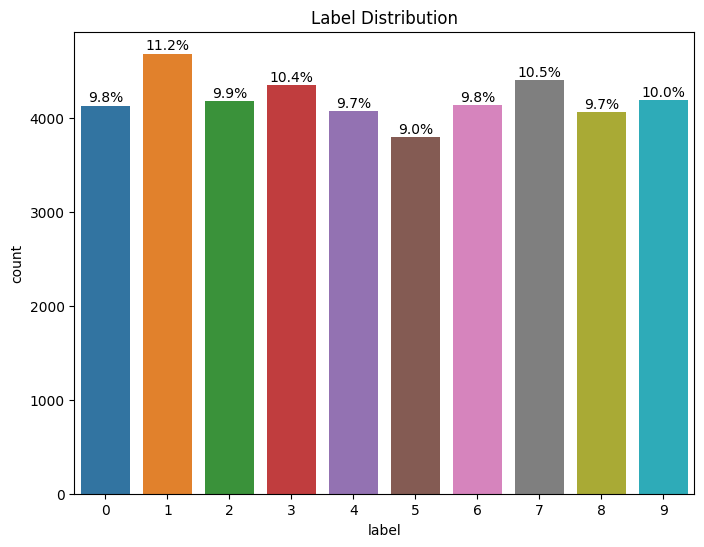

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='label',data=df_train)

plt.title("Label Distribution")
total= len(df_train.label)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [ ]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
df_train.sum(axis=1)

0        16650
1        44609
2        13426
3        15029
4        51093
         ...  
41995    29310
41996    13416
41997    31511
41998    26387
41999    18187
Length: 42000, dtype: int64

In [ ]:
df_train.shape

(42000, 785)

In [ ]:
pixels = df_train.columns.tolist()[1:]
df_train["sum"] = df_train[pixels].sum(axis=1)

df_test["sum"] = df_test[pixels].sum(axis=1)

In [ ]:
df_train.groupby(['label'])['sum'].mean()

label
0    34632.407551
1    15188.466268
2    29871.099354
3    28320.188003
4    24232.722495
5    25835.920422
6    27734.917331
7    22931.244263
8    30184.148413
9    24553.750000
Name: sum, dtype: float64

In [ ]:
# separate target values from df_train
targets = df_train.label
features = df_train.drop("label",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features[:] = scaler.fit_transform(features)
df_test[:] = scaler.transform(df_test)

<ipython-input-13-7159a4bed7df>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  features[:] = scaler.fit_transform(features)
<ipython-input-13-7159a4bed7df>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test[:] = scaler.transform(df_test)


In [ ]:
del df_train

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(features)

In [ ]:
Y_sklearn

array([[-5.27228134, -5.22739241],
       [19.38070034,  6.06197076],
       [-7.83432081, -1.70798375],
       ...,
       [ 0.60959845,  7.06765952],
       [ 2.25998713, -4.33642934],
       [-4.89817708,  1.55428514]])

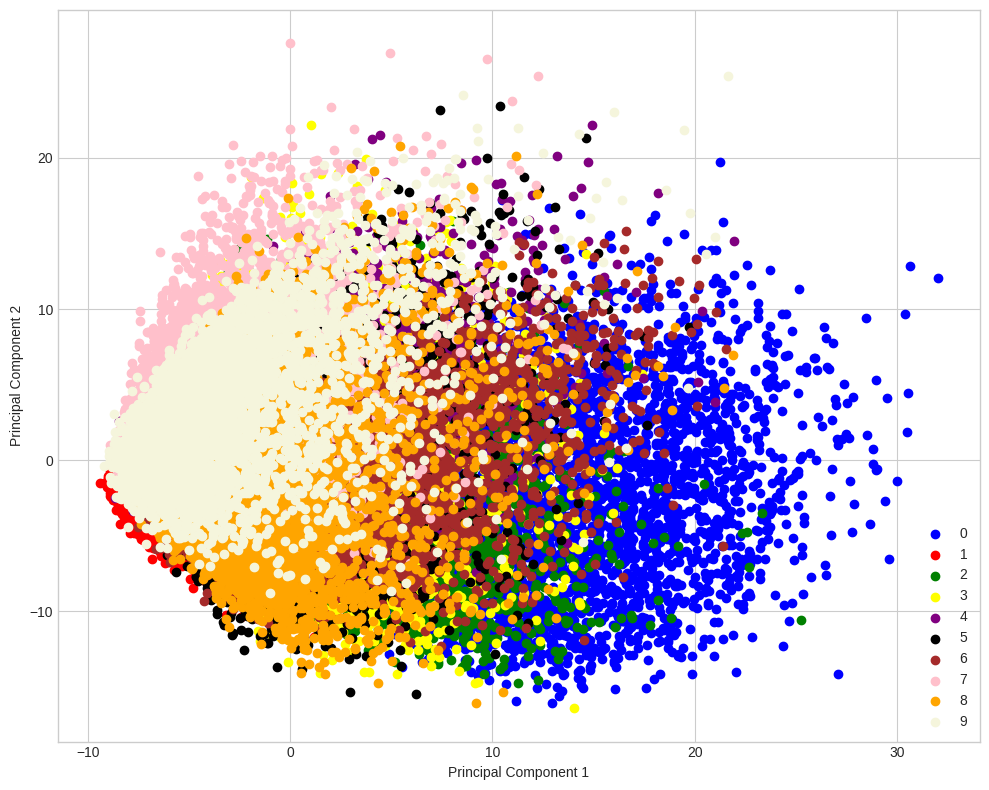

In [ ]:
#referred to https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html and  https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))
    for lab, col in zip((0,1,2,3,4,5,6,7,8,9),
                       ('blue','red','green','yellow','purple','black','brown','pink','orange','beige')):
        plt.scatter(Y_sklearn[targets==lab, 0],
                    Y_sklearn[targets==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [ ]:
features.index

RangeIndex(start=0, stop=42000, step=1)

In [ ]:
sklearn_pca_3 = sklearnPCA(n_components=3)
Y_sklearn_3 = sklearn_pca_3.fit_transform(features)
Y_sklearn_3_test = sklearn_pca_3.transform(df_test)

In [ ]:
# Store results of PCA in a data frame
result=pd.DataFrame(Y_sklearn_3, columns=['PCA%i' % i for i in range(3)], index=features.index)

In [ ]:
result

,PCA0,PCA1,PCA2
0,-5.272207,-5.227063,3.888670
1,19.380777,6.061839,1.339183
2,-7.834379,-1.708635,2.291382
3,-0.706244,5.847512,2.022948
4,26.648635,6.067091,0.982034
...,...,...,...
41995,13.527938,-1.320570,-3.914772
41996,-9.041432,-1.192851,2.321081
41997,0.609642,7.067711,-12.099980
41998,2.259988,-4.336175,0.713663


<Figure size 480x480 with 0 Axes>

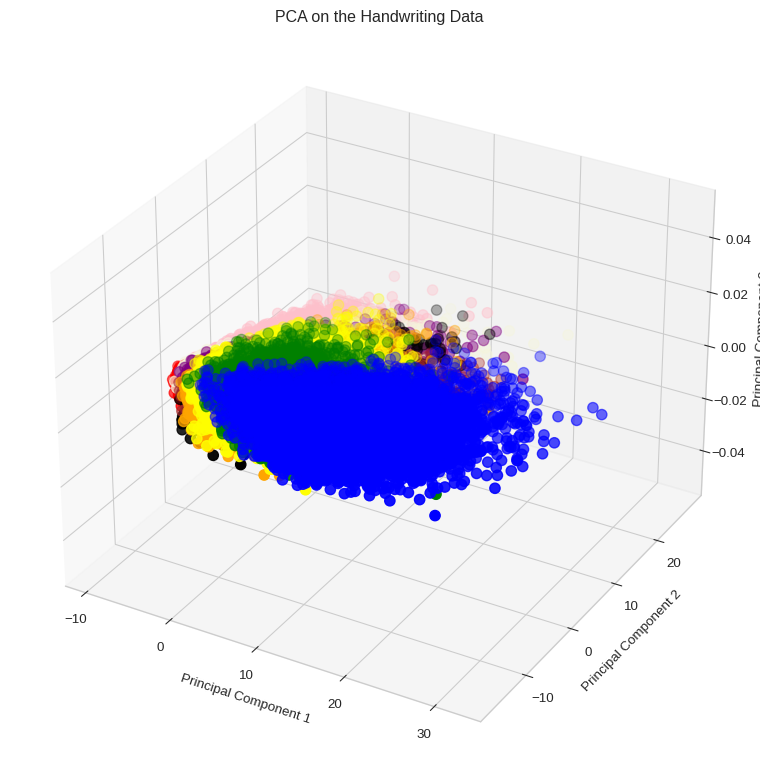

In [ ]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

with plt.style.context('seaborn-whitegrid'):
    my_dpi=96
    fig = plt.figure(figsize=(10, 10), dpi=my_dpi)
    ax = fig.add_subplot(111,projection ='3d')
    for lab, col in zip((0,1,2,3,4,5,6,7,8,9),
                       ('blue','red','green','yellow','purple','black','brown','pink','orange','beige')):
        plt.scatter(Y_sklearn[targets==lab, 0],
                    Y_sklearn[targets==lab, 1],
                    label=lab,
                    c=col,s =60)                
        
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title("PCA on the Handwriting Data")
    plt.show()

In [ ]:
encoder = LabelEncoder()
targets[:] = encoder.fit_transform(targets[:])

In [ ]:
X_train,X_val, y_train,y_val = train_test_split(result,targets,random_state=1)

# Making a Model and Predictions

In [ ]:
# 3 Principal Components
model = XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=10)

history = model.fit(X_train, y_train,eval_set =[(X_val,y_val)],early_stopping_rounds =50)
acc = accuracy_score(y_val, model.predict(X_val))
print(f"Accuracy: , {round(acc,3)}")







/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[09:59:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[0]	validation_0-mlogloss:1.87610
[1]	validation_0-mlogloss:1.69518
[2]	validation_0-mlogloss:1.57449
[3]	validation_0-mlogloss:1.49019
[4]	validation_0-mlogloss:1.42450
[5]	validation_0-mlogloss:1.37601
[6]	validation_0-mlogloss:1.33645
[7]	validation_0-mlogloss:1.30595
[8]	validation_0-mlogloss:1.28087
[9]	validation_0-mlogloss:1.26042
[10]	validation_0-mlogloss:1.24541
[11]	validation_0-mlogloss:1.22937
[12]	validation_0-mlogloss:1.21670
[13]	validation_0-mlogloss:1.20779
[14]	validation_0-mlogloss:1.19957
[15]	validation_0-mlogloss:1.19237
[16]	validation_0-mlogloss:1.18643
[17]	validation_0-mlogloss:1.18146
[18]	validation_0-mlogloss:1.17696
[19]	validation_0-mlogloss:1.17350
[20]	validation_0-mlogloss:1.17012
[21]	validation_0-mlogloss:1.16756
[22]	validation_0-mlogloss:1.16452
[23]	validation_0-mlogloss:1.16256
[24]	validation_0-mlogloss:1.16094
[25]	validation_0-mlogloss:1.15927
[26]	valida

In [ ]:
X_train,X_val, y_train,y_val = train_test_split(features,targets,random_state=1)


In [ ]:

model = XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=10)

history = model.fit(X_train, y_train,eval_set =[(X_train,y_train),(X_val,y_val)],early_stopping_rounds =5)
acc = accuracy_score(y_val, model.predict(X_val))
print(f"Accuracy: , {round(acc,3)}")

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10:00:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[0]	validation_0-mlogloss:1.42839	validation_1-mlogloss:1.44561
[1]	validation_0-mlogloss:1.09931	validation_1-mlogloss:1.13044
[2]	validation_0-mlogloss:0.88151	validation_1-mlogloss:0.92129
[3]	validation_0-mlogloss:0.72542	validation_1-mlogloss:0.77069
[4]	validation_0-mlogloss:0.60957	validation_1-mlogloss:0.65913
[5]	validation_0-mlogloss:0.51863	validation_1-mlogloss:0.57078
[6]	validation_0-mlogloss:0.44818	validation_1-mlogloss:0.50382
[7]	validation_0-mlogloss:0.38978	validation_1-mlogloss:0.44809
[8]	validation_0-mlogloss:0.34231	validation_1-mlogloss:0.40327
[9]	validation_0-mlogloss:0.30416	validation_1-mlogloss:0.36713
[10]	validation_0-mlogloss:0.27250	validation_1-mlogloss:0.33768
[11]	validation_0-mlogloss:0.24479	validation_1-mlogloss:0.31212
[12]	validation_0-mlogloss:0.22142	validation_1-mlogloss:0.29099
[13]	validation_0-mlogloss:0.20190	validation_1-mlogloss:0.27290
[14]	valida

In [ ]:
results = model.evals_result()

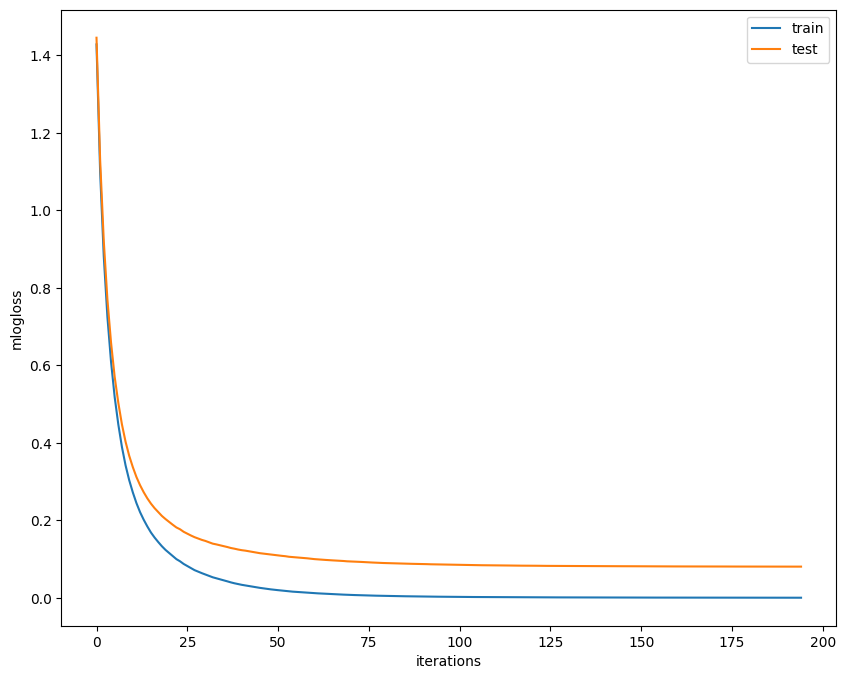

In [ ]:
from matplotlib import pyplot
# plot learning curves
plt.figure(figsize=(10, 8))
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
pyplot.legend()
plt.xlabel('iterations')
plt.ylabel('mlogloss')
# show the plot
pyplot.show()

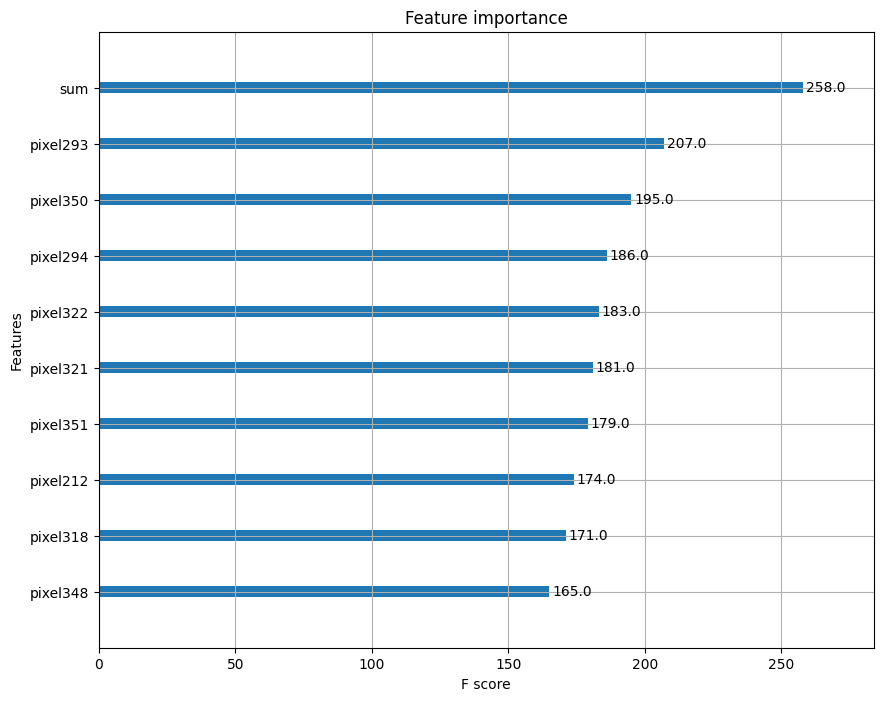

In [ ]:
from xgboost import plot_importance
ax = plot_importance(model,max_num_features=10)
fig = ax.figure
fig.set_size_inches(10,8)
plt.show()

In [ ]:
predictions = model.predict(df_test)



In [ ]:
output = pd.read_csv("/content/drive/MyDrive/kgce lms/expt6/sample_submission.csv")
output['Label'] = predictions
output.to_csv('submission.csv',index=False)


1.What is Decision Tree Algorithm ? Which type of ML we can solve using Decision Tree?    
Ans:-A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data . It is a tree-like model of decisions and their possible consequences, including possible chance events and their probabilities.
The decision tree algorithm is used when the target variable is categorical, and it helps to solve both classification and regression problems. It is often used for problems where the input data has both categorical and continuous features.

Decision trees can handle both continuous and categorical data and can be used for both regression and classification tasks. They are easy to understand and interpret, and the resulting models are often human-readable, which makes them valuable for solving problems where understanding the model's reasoning is important.
To build a decision tree model, the algorithm starts with the root node, and then it recursively splits the input data based on the feature that best separates the data into homogenous chunks, until the data can be cleanly classified.

2.What do you mean by ensemble learning ?  Does XGBoost support ensemble learning ?    

Ans:-Ensemble learning is a machine learning technique that involves combining multiple models to improve the overall performance of the system. The idea behind ensemble learning is that when multiple models are combined, they may compensate for each other's weaknesses and produce a stronger overall prediction.
Ensemble methods are widely used across different domains, including classification and regression tasks. Some popular ensemble methods include bagging, boosting, and stacking.

XGBoost (eXtreme Gradient Boosting) is a popular ensemble learning algorithm that is known for its high performance in classification and regression tasks. It is based on the gradient boosting algorithm, which iteratively combines weak models into a stronger overall model. XGBoost has been used in many real-world applications, including web search ranking, image classification, and recommendation systems.
ensemble learning is a powerful technique that can help improve the overall performance of machine learning models, and XGBoost is a popular algorithm for implementing ensemble learning in a variety of applications.

3.What is Principal Component Analysis ? Why do we use PCA in our notebook?  
Ans:-
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of large data sets by identifying patterns and correlations among variables . The technique involves transforming the data into a new coordinate system, where the first axis corresponds to the direction of maximum variation in the data, the second axis corresponds to the direction of maximum remaining variation, and so on.

PCA is particularly useful when dealing with high-dimensional data sets, as it can help to identify the most important features in the data and remove noise and redundancy. It is commonly used in data analysis and machine learning to visualize and explore complex data sets, as well as to improve the performance of models by reducing the dimensionality of the input data.

4.Check use of "StandardScalar" class from sklearn in notebook. What do you think is this API used for?   

Ans:-StandardScaler class from Scikit-learn, which is used for standardizing features of a dataset. The StandardScaler class scales each feature (i.e. variable) of the dataset to have zero mean and unit variance, by subtracting the mean and dividing by the standard deviation across each respective feature.
This preprocessing step can be important for many machine learning algorithms, particularly those based on distance metrics (e.g. k-nearest neighbors, SVMs, etc.), as it ensures each feature has equal impact on the model's prediction. Without the standardization, some features with larger variance could dominate the model, leading to biased and inaccurate results.

5.Consider statement  "model = XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, num_classes=10) " in the notebook explain purpose of each parameter of this constructor. What are we doing here defining a model with specific parameters or training the model?
   
   Ans:-   The XGBClassifier is a class in the XGBoost library that implements the gradient boosting algorithm for multiclass classification. The line of code is defining a new instance of the XGBClassifier class and setting various hyperparameters that control its behavior.


max_depth: The maximum depth of each decision tree in the ensemble. This parameter controls the complexity of the model and its ability to fit the training data, as well as its generalization performance on new data.

objective: The objective function to optimize during training, which sets the loss function to be minimized. In this case, we are using multi:softprob, which corresponds to the softmax function used in multiclass classification problems.

n_estimators: The number of decision trees (i.e., boosted estimators) to include in the ensemble. This parameter determines the size of the model and can impact its accuracy.

num_classes: The number of classes in the multiclass classification problem. This parameter simply specifies the number of possible classes that the model will predict.

6.What step in ML pipeline fit fuction carries out?    
Ans:-In a typical machine learning pipeline, the fit() function is responsible for training a model on a given dataset. The fit() method is typically called on an estimator object (such as a classifier or a regressor) and the dataset (consisting of the features and the labels/targets).
During the fit step, the estimator object computes and stores the coefficients/parameters that define the model, using an optimization algorithm to minimize a loss function with respect to these coefficients. The goal is to find the set of parameters that best fit the training data, such that the model can accurately predict the target values for unseen data.

Once the estimator object is fitted on the training data, it can be used to make predictions on new data using the predict() function or its variants.
the fit step is just one component of a larger machine learning pipeline, which may also include steps such as data preprocessing, feature selection, and hyperparameter tuning, among others. The entire pipeline can be constructed using tools such as Scikit-learn's Pipeline class, which allows you to chain together multiple transformations and estimators into a single object that can be fit and used to make predictions efficientl